In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


# data cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [25]:
df = df.drop_duplicates()

In [26]:
df = df.dropna()

In [27]:
df = df.reset_index(drop=True)

In [28]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [29]:
# convert types
df['Product Category'] = df['Product Category'].astype('str')
df['Product Name'] = df['Product Name'].astype('str')
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [31]:
# data analysis

df['Month'] = df['Date'].dt.month
df1 = df.groupby('Month')['Units Sold'].mean()

In [32]:
df1.head()

Month
1    2.193548
2    2.655172
3    2.645161
4    2.166667
5    1.935484
Name: Units Sold, dtype: float64

<Axes: title={'center': 'Average Units Sold by Month'}, xlabel='Month'>

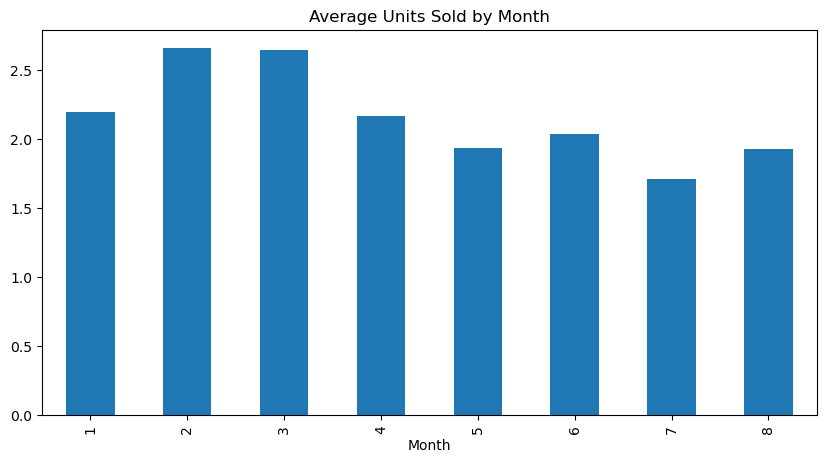

In [33]:
# Visualisation

df1.plot(kind='bar', figsize=(10,5), title= 'Average Units Sold by Month')

In [34]:
def load_data(path):
    return pd.read_csv(path)

In [35]:
def data_cleaning(data):
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.reset_index(drop = True)
    return data

In [36]:
def convert_dtypes(data, types_dict = None):
    data = data.astype(dtype = types_dict)
    data['Date'] = pd.to_datetime(data['Date'])
    return data

In [37]:
def data_analysis(data):
    data['month'] = data['Date'].dt.month
    new_df = data.groupby('month')['Units Sold'].mean()
    return new_df

In [38]:
def data_visualisation(new_df, vis_type='bar'):
    new_df.plot(kind=vis_type, figsize=(10,5), title='Average Units Sold by Month')
    return new_df

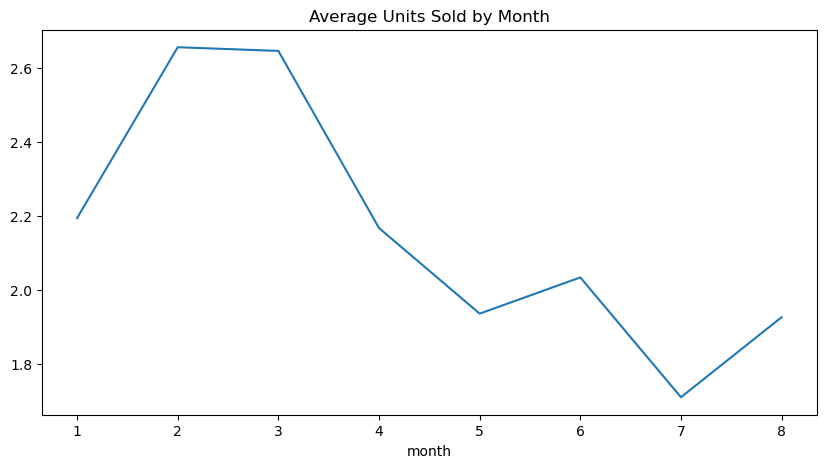

In [39]:
path = 'Online Sales Data.csv'
df = (pd.DataFrame()
        .pipe(lambda x: load_data(path))
        .pipe(data_cleaning)
        .pipe(convert_dtypes,{'Product Category':'str', 'Product Name':'str'})
        .pipe(data_analysis)
        .pipe(data_visualisation,'line')
        )